# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, I will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, I will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. My task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, I will identify patterns, outliers, and correlations in the data, allowing me to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, I will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`.

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

I may explore this dataset in any way I would like, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [30]:
# 1) Load the dataset  
excel_path = "Online_Retail.xlsx"
df = pd.read_excel(excel_path)  

In [32]:
# 2) Quick preview  
print("Columns:", df.columns.tolist())  
print(df.head(10))  
print(df.info())  

Columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       

In [33]:
# DATA CLEANING  #

 3. Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing values:")
for col in df.columns:
   if missing_values[col] > 0:
        print(f"{col}: {missing_values[col]} missing values ({missing_percentage[col]:.2f}%)")

# Handle missing values
# For CustomerID - this is critical for customer analysis
# We'll keep track of how many records we're losing
print(f"\nRecords before handling missing CustomerID: {len(df)}")
df_clean = df.dropna(subset=['CustomerID'])
print(f"Records after handling missing CustomerID: {len(df_clean)}")
print(f"Removed {len(df) - len(df_clean)} records ({((len(df) - len(df_clean)) / len(df)) * 100:.2f}%)")

# For Description - fill with a placeholder if any are missing
if missing_values['Description'] > 0:
    df_clean['Description'] = df_clean['Description'].fillna('Unknown Product')



Missing values:
Description: 1454 missing values (0.27%)
CustomerID: 135080 missing values (24.93%)

Records before handling missing CustomerID: 541909
Records after handling missing CustomerID: 406829
Removed 135080 records (24.93%)


C:\Users\rkshc\AppData\Local\Temp\ipykernel_10336\3054972773.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Description'] = df_clean['Description'].fillna('Unknown Product')



Number of duplicate records: 5225
Removed 5225 duplicate records


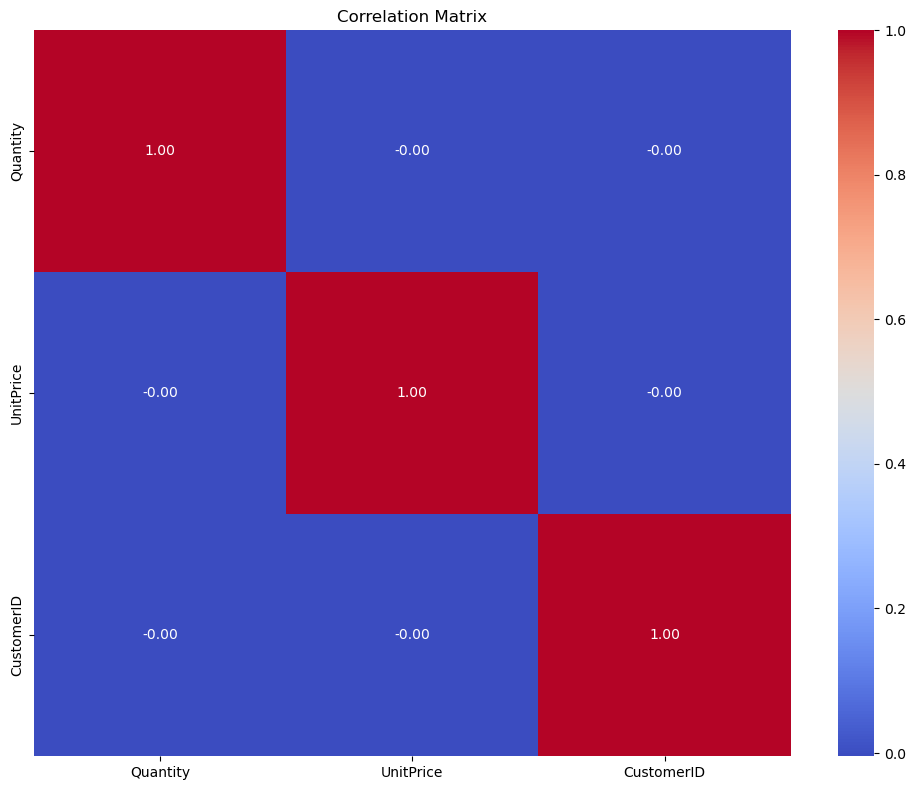

In [34]:
# 4. Check for duplicate records
duplicates = df_clean.duplicated().sum()
print(f"\nNumber of duplicate records: {duplicates}")
if duplicates > 0:
   df_clean = df_clean.drop_duplicates()
    print(f"Removed {duplicates} duplicate records")

# 5. Check for redundant columns
# Calculate correlation for numeric columns
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
if len(numeric_cols) > 1:
   correlation = df_clean[numeric_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

# 6. Check column variance to identify potentially unnecessary columns
for col in numeric_cols:
    if df_clean[col].nunique() == 1:
        print(f"Column '{col}' has only one unique value and could be removed")

# 7. Check for columns with too many unique values (potential IDs that might not be useful for analysis)
for col in df_clean.columns:
    unique_ratio = df_clean[col].nunique() / len(df_clean)
    if unique_ratio > 0.9 and col not in ['InvoiceNo', 'CustomerID']:
        print(f"Column '{col}' has {df_clean[col].nunique()} unique values ({unique_ratio:.2f} ratio) - consider if needed")

# 8. Remove any identified redundant columns
# Based on the dataset description, all columns seem relevant for the analysis
# If you identify any redundant columns during analysis, add them to this list
redundant_columns = []

if redundant_columns:
    df_clean = df_clean.drop(columns=redundant_columns)
    print(f"\nRemoved redundant columns: {redundant_columns}")

# 9. Convert data types for efficiency
df_clean['CustomerID'] = df_clean['CustomerID'].astype(int).astype(str)
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])


In [35]:
# 10. Remove records with invalid values (negative quantities or prices)
invalid_records = df_clean[(df_clean['Quantity'] <= 0) | (df_clean['UnitPrice'] <= 0)].shape[0]
if invalid_records > 0:
    print(f"\nFound {invalid_records} records with negative or zero quantity/price")
    df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]
    print(f"Removed {invalid_records} invalid records")

# 11. Final check for missing values
print("\nMissing values in cleaned dataset:")
print(df_clean.isnull().sum())

# 12. Display summary of the cleaned dataset
print("\nCleaned dataset shape:", df_clean.shape)
print(f"Total records removed: {len(df) - len(df_clean)}")

# 13. Save the cleaned dataset
df_clean.to_csv('cleaned_online_retail.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_online_retail.csv'")


Found 8912 records with negative or zero quantity/price
Removed 8912 invalid records

Missing values in cleaned dataset:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Cleaned dataset shape: (392692, 8)
Total records removed: 149217

Cleaned dataset saved as 'cleaned_online_retail.csv'



===== BASIC STATISTICS FOR NUMERICAL VARIABLES =====
               Quantity      UnitPrice     TotalPrice
count     392692.000000  392692.000000  392692.000000
mean          13.119702       3.125914      22.631500
std          180.492832      22.241836     311.099224
min            1.000000       0.001000       0.001000
25%            2.000000       1.250000       4.950000
50%            6.000000       1.950000      12.450000
75%           12.000000       3.750000      19.800000
max        80995.000000    8142.750000  168469.600000
range      80994.000000    8142.749000  168469.599000
variance   32577.662399     494.699251   96782.727382
skewness     407.345663     202.740861     448.521779
kurtosis  175940.085113   57398.335042  229148.857198
mode           1.000000       1.250000      15.000000


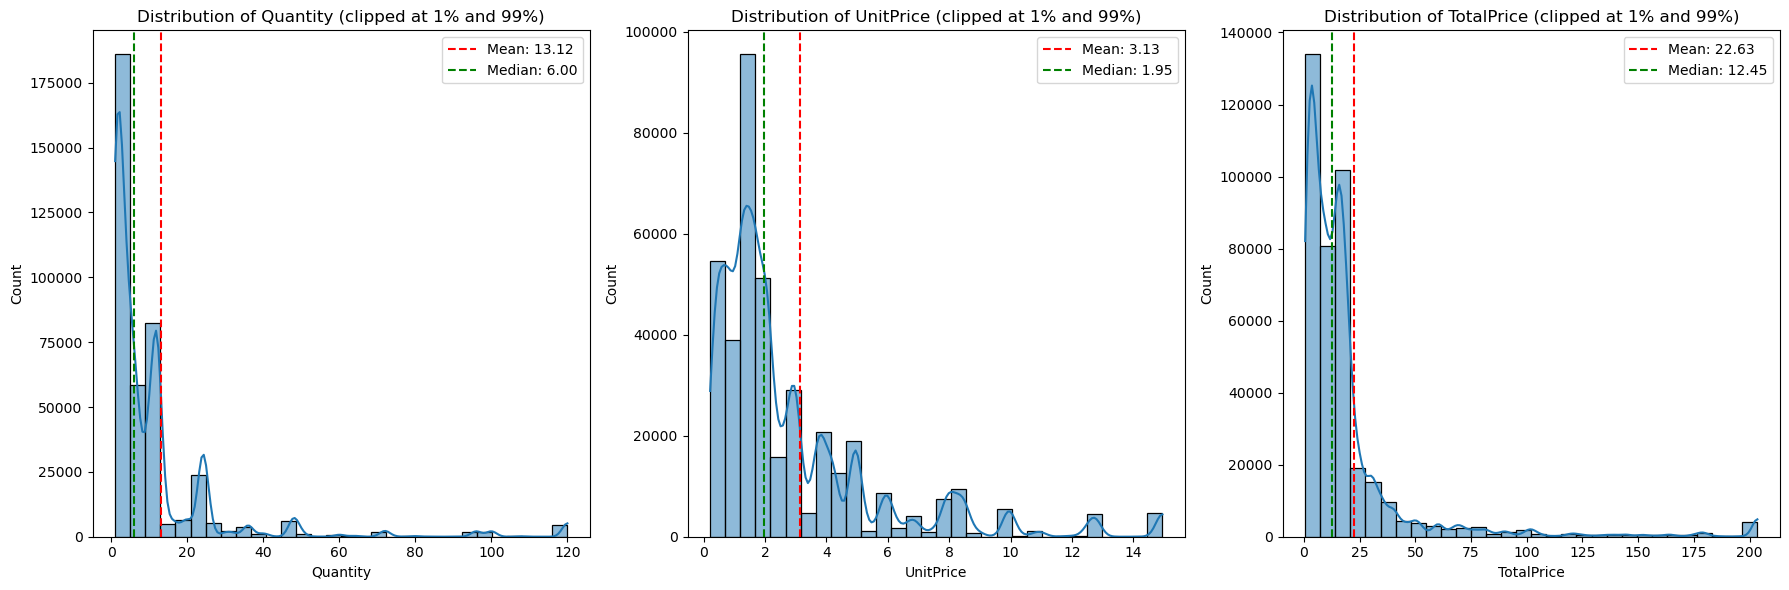

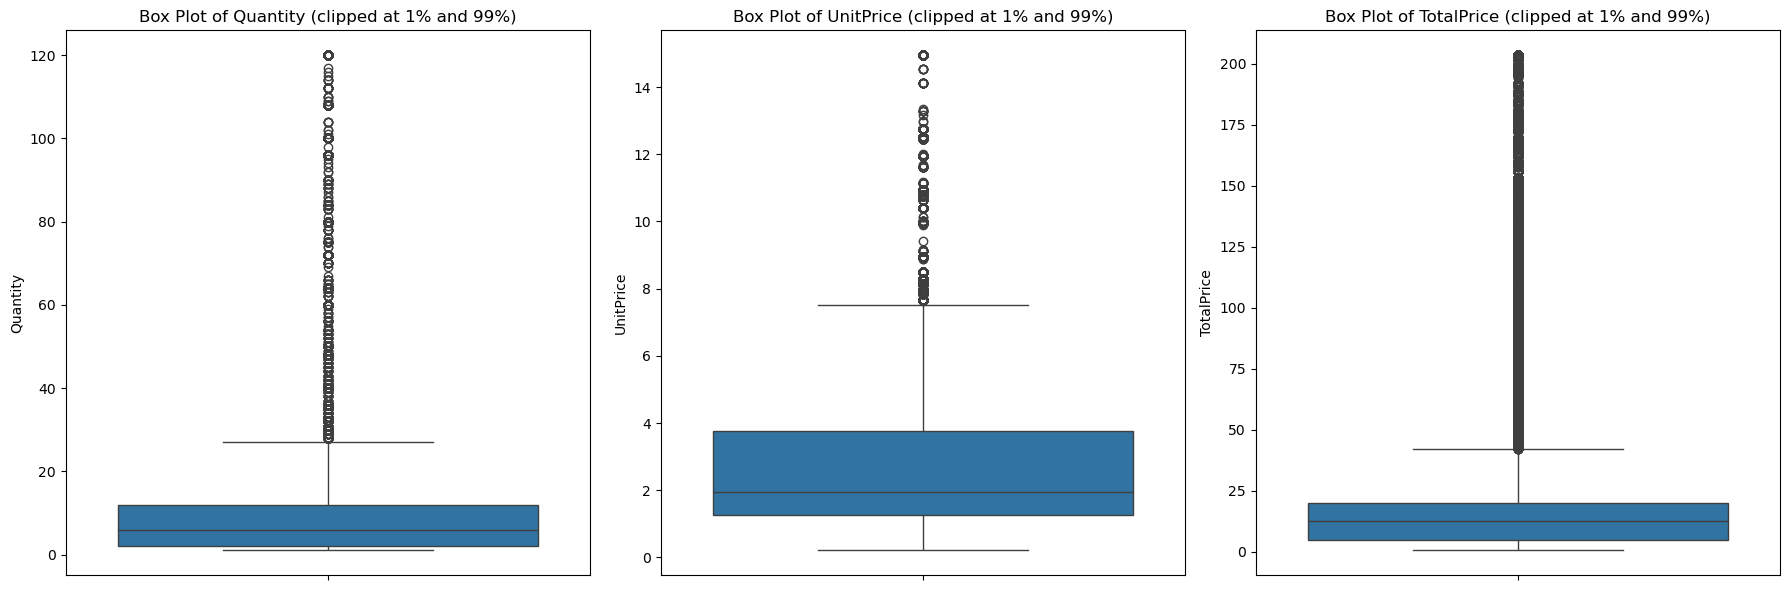

In [54]:
# DATA ANALYSIS #
# Add TotalPrice column for analysis
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

# 1. Basic statistics for numerical variables
print("\n===== BASIC STATISTICS FOR NUMERICAL VARIABLES =====")
numeric_stats = df_clean[['Quantity', 'UnitPrice', 'TotalPrice']].describe()
# Add more statistical measures
numeric_stats.loc['range'] = numeric_stats.loc['max'] - numeric_stats.loc['min']
numeric_stats.loc['variance'] = df_clean[['Quantity', 'UnitPrice', 'TotalPrice']].var()
numeric_stats.loc['skewness'] = df_clean[['Quantity', 'UnitPrice', 'TotalPrice']].skew()
numeric_stats.loc['kurtosis'] = df_clean[['Quantity', 'UnitPrice', 'TotalPrice']].kurtosis()
numeric_stats.loc['mode'] = [stats.mode(df_clean['Quantity'], keepdims=True)[0][0], 
                            stats.mode(df_clean['UnitPrice'], keepdims=True)[0][0],
                            stats.mode(df_clean['TotalPrice'], keepdims=True)[0][0]]
print(numeric_stats)

# 2. Visualize distributions with histograms
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(df_clean['Quantity'].clip(lower=df_clean['Quantity'].quantile(0.01), 
                                      upper=df_clean['Quantity'].quantile(0.99)), 
             kde=True, bins=30)
plt.title('Distribution of Quantity (clipped at 1% and 99%)')
plt.axvline(df_clean['Quantity'].mean(), color='red', linestyle='--', label=f'Mean: {df_clean["Quantity"].mean():.2f}')
plt.axvline(df_clean['Quantity'].median(), color='green', linestyle='--', label=f'Median: {df_clean["Quantity"].median():.2f}')
plt.legend()

plt.subplot(1, 3, 2)
sns.histplot(df_clean['UnitPrice'].clip(lower=df_clean['UnitPrice'].quantile(0.01), 
                                       upper=df_clean['UnitPrice'].quantile(0.99)), 
             kde=True, bins=30)
plt.title('Distribution of UnitPrice (clipped at 1% and 99%)')
plt.axvline(df_clean['UnitPrice'].mean(), color='red', linestyle='--', label=f'Mean: {df_clean["UnitPrice"].mean():.2f}')
plt.axvline(df_clean['UnitPrice'].median(), color='green', linestyle='--', label=f'Median: {df_clean["UnitPrice"].median():.2f}')
plt.legend()

plt.subplot(1, 3, 3)
sns.histplot(df_clean['TotalPrice'].clip(lower=df_clean['TotalPrice'].quantile(0.01), 
                                        upper=df_clean['TotalPrice'].quantile(0.99)), 
             kde=True, bins=30)
plt.title('Distribution of TotalPrice (clipped at 1% and 99%)')
plt.axvline(df_clean['TotalPrice'].mean(), color='red', linestyle='--', label=f'Mean: {df_clean["TotalPrice"].mean():.2f}')
plt.axvline(df_clean['TotalPrice'].median(), color='green', linestyle='--', label=f'Median: {df_clean["TotalPrice"].median():.2f}')
plt.legend()

plt.tight_layout()
plt.show()

# 3. Box plots to visualize dispersion and outliers
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=df_clean['Quantity'].clip(lower=df_clean['Quantity'].quantile(0.01), 
                                      upper=df_clean['Quantity'].quantile(0.99)))
plt.title('Box Plot of Quantity (clipped at 1% and 99%)')

plt.subplot(1, 3, 2)
sns.boxplot(y=df_clean['UnitPrice'].clip(lower=df_clean['UnitPrice'].quantile(0.01), 
                                       upper=df_clean['UnitPrice'].quantile(0.99)))
plt.title('Box Plot of UnitPrice (clipped at 1% and 99%)')

plt.subplot(1, 3, 3)
sns.boxplot(y=df_clean['TotalPrice'].clip(lower=df_clean['TotalPrice'].quantile(0.01), 
                                        upper=df_clean['TotalPrice'].quantile(0.99)))
plt.title('Box Plot of TotalPrice (clipped at 1% and 99%)')

plt.tight_layout()
plt.show()

In [55]:
# 4. Categorical variables statistics
print("\n===== CATEGORICAL VARIABLES STATISTICS =====")
print("\nCountry Distribution:")
country_stats = df_clean['Country'].value_counts()
country_percentage = (country_stats / country_stats.sum() * 100).round(2)
country_summary = pd.DataFrame({
    'Count': country_stats,
    'Percentage (%)': country_percentage
})
print(country_summary.head(10))  # Top 10 countries

# 5. Time-based statistics
print("\n===== TIME-BASED STATISTICS =====")
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['DayOfWeek'] = df_clean['InvoiceDate'].dt.dayofweek

# Monthly statistics
monthly_stats = df_clean.groupby('Month')['TotalPrice'].agg(['count', 'sum', 'mean', 'median', 'std'])
monthly_stats.columns = ['Transaction Count', 'Total Sales', 'Average Sale', 'Median Sale', 'Std Dev']
monthly_stats = monthly_stats.reset_index()
monthly_stats['Month'] = pd.Categorical(monthly_stats['Month'], categories=range(1, 13), ordered=True)
monthly_stats = monthly_stats.sort_values('Month')
print("\nMonthly Statistics:")
print(monthly_stats)

# 6. Customer statistics
customer_stats = df_clean.groupby('CustomerID')['TotalPrice'].agg(['count', 'sum', 'mean', 'median', 'std'])
customer_stats.columns = ['Transaction Count', 'Total Spent', 'Average Purchase', 'Median Purchase', 'Std Dev']
print("\nCustomer Statistics Summary:")
print(customer_stats.describe())

# 7. Product statistics
product_stats = df_clean.groupby('StockCode')['Quantity'].agg(['count', 'sum', 'mean', 'median', 'std'])
product_stats.columns = ['Transaction Count', 'Total Quantity', 'Average Quantity', 'Median Quantity', 'Std Dev']


===== CATEGORICAL VARIABLES STATISTICS =====

Country Distribution:
                 Count  Percentage (%)
Country                               
United Kingdom  349203           88.93
Germany           9025            2.30
France            8326            2.12
EIRE              7226            1.84
Spain             2479            0.63
Netherlands       2359            0.60
Belgium           2031            0.52
Switzerland       1841            0.47
Portugal          1453            0.37
Australia         1181            0.30

===== TIME-BASED STATISTICS =====

Monthly Statistics:
   Month  Transaction Count  Total Sales  Average Sale  Median Sale  \
0      1              20988   568101.310     27.067911        12.60   
1      2              19706   446084.920     22.637010        13.20   
2      3              26870   594081.760     22.109481        12.75   
3      4              22433   468374.331     20.878809        12.75   
4      5              28073   677355.150     24.1283

In [56]:
# Ensure InvoiceDate is datetime
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# Extract date components for time analysis
df_clean['Date'] = df_clean['InvoiceDate'].dt.date
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['MonthName'] = df_clean['InvoiceDate'].dt.strftime('%b')
df_clean['Day'] = df_clean['InvoiceDate'].dt.day
df_clean['DayOfWeek'] = df_clean['InvoiceDate'].dt.dayofweek
df_clean['DayName'] = df_clean['InvoiceDate'].dt.day_name()
df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour

print(f"Dataset shape: {df_clean.shape}")
print(f"Date range: {df_clean['InvoiceDate'].min().date()} to {df_clean['InvoiceDate'].max().date()}")

Dataset shape: (392692, 17)
Date range: 2010-12-01 to 2011-12-09



===== SALES TRENDS OVER TIME =====


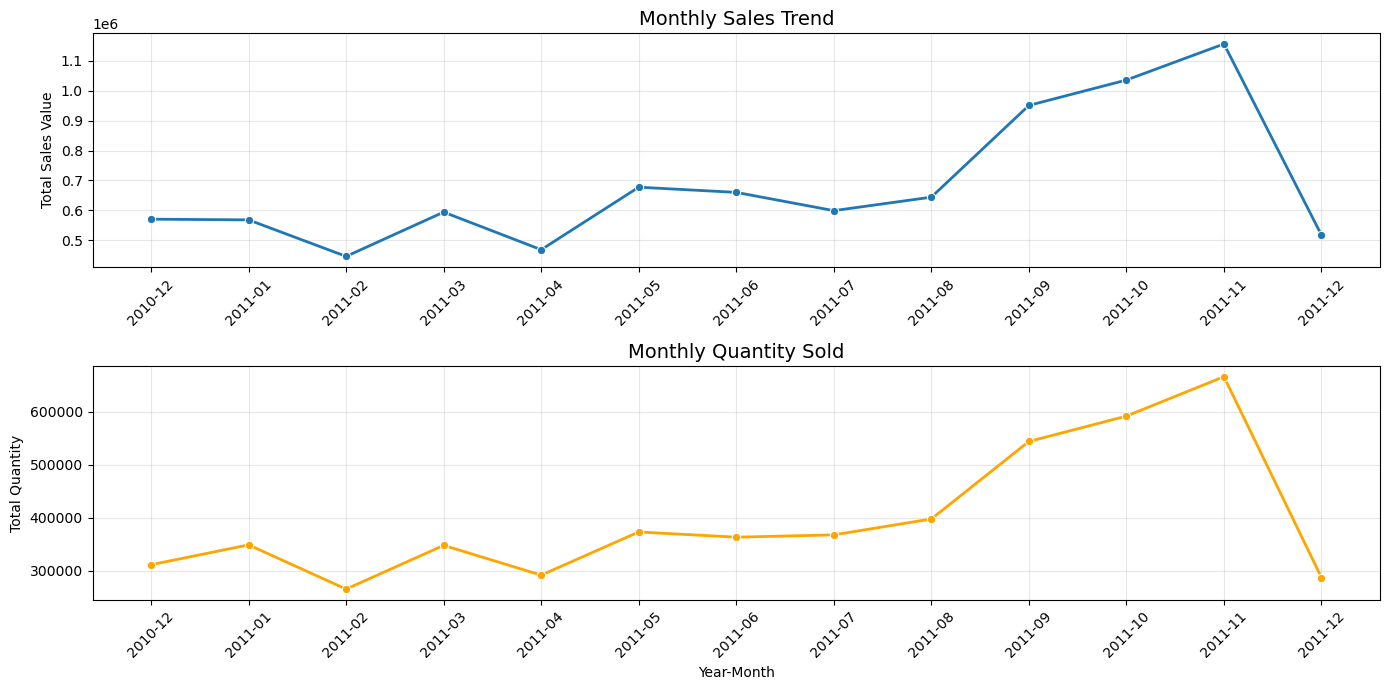


Top 3 busiest months by sales value:
Nov 2011: $1156205.61
Oct 2011: $1035642.45
Sep 2011: $950690.20

Top 3 busiest months by quantity sold:
Nov 2011: 665923 units
Oct 2011: 591543 units
Sep 2011: 543652 units


C:\Users\rkshc\AppData\Local\Temp\ipykernel_10336\2307115656.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayName', y='TotalPrice', data=day_of_week, palette='viridis')
C:\Users\rkshc\AppData\Local\Temp\ipykernel_10336\2307115656.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayName', y='InvoiceNo', data=day_of_week, palette='viridis')


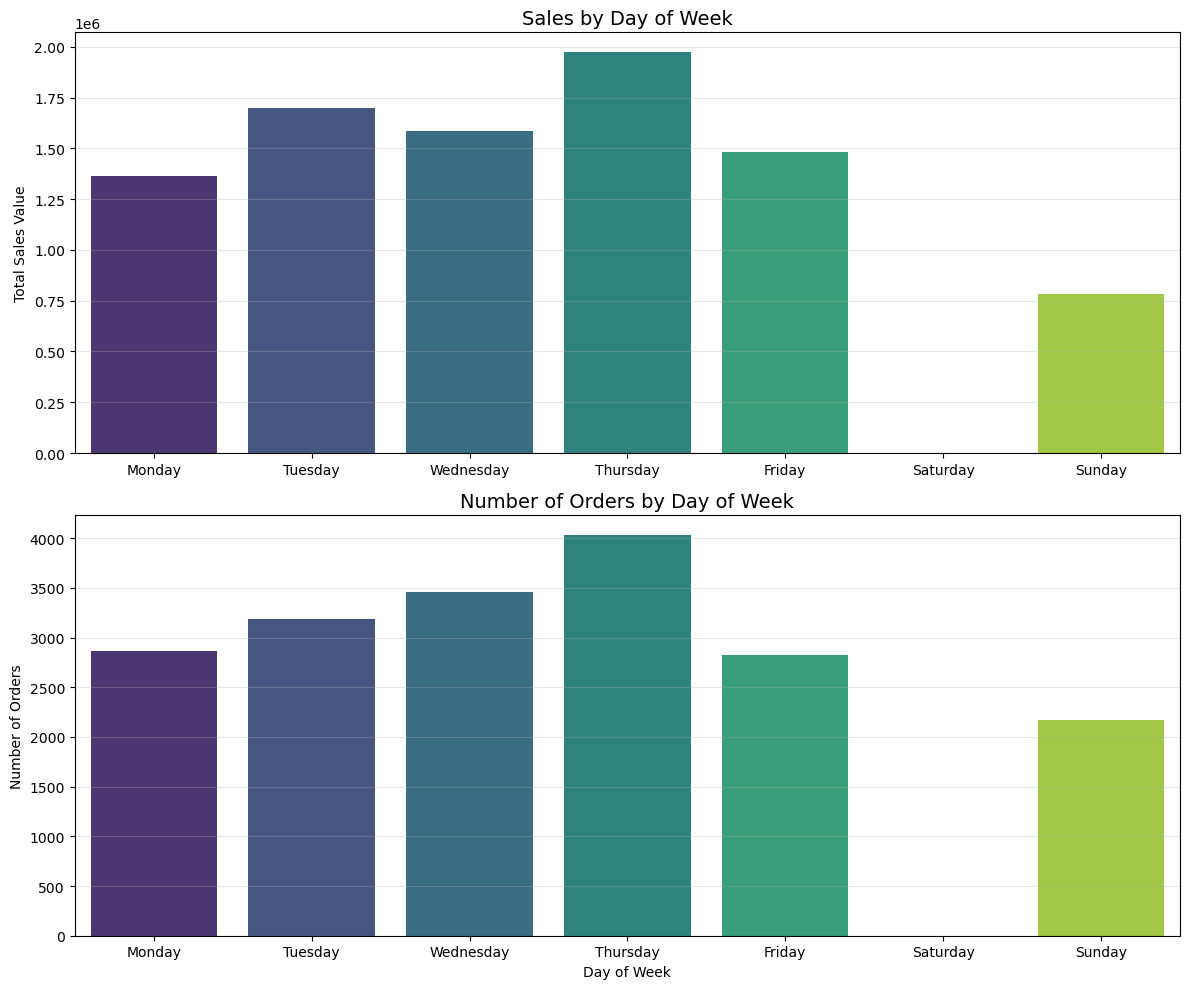


Busiest days of the week:
Thursday: $1973015.73 from 4032 orders
Tuesday: $1697733.80 from 3184 orders
Wednesday: $1584283.83 from 3455 orders
Friday: $1483080.81 from 2829 orders
Monday: $1363604.40 from 2863 orders
Sunday: $785490.32 from 2169 orders


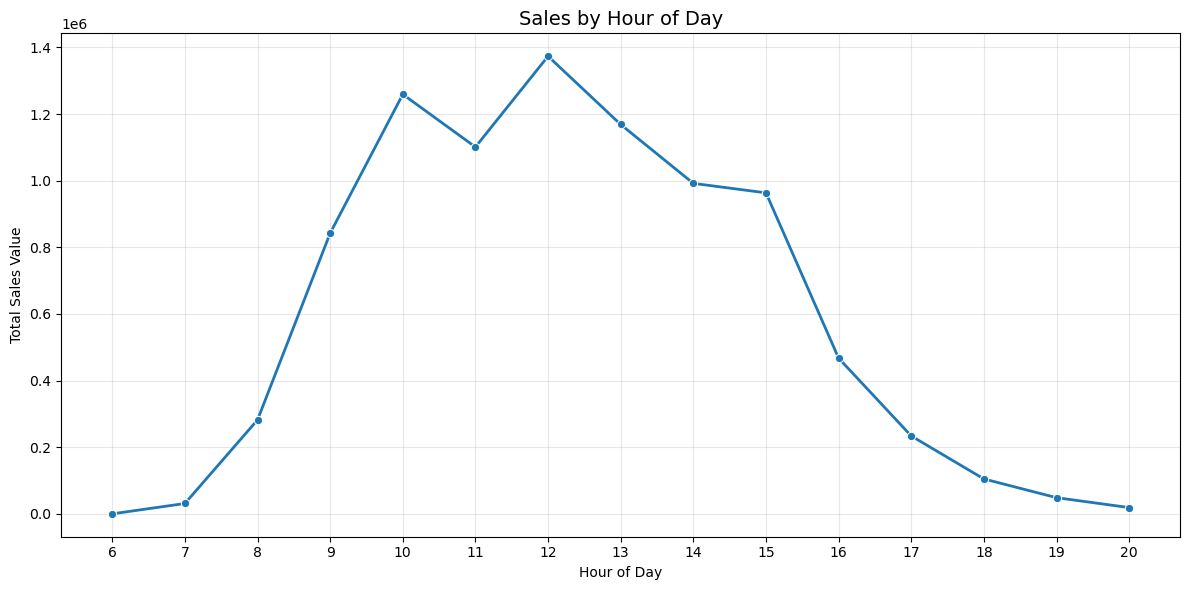


Peak sales hours:
12.0:00 - 13.0:00: $1373695.39 from 3130.0 orders
10.0:00 - 11.0:00: $1259267.59 from 2226.0 orders
13.0:00 - 14.0:00: $1168724.20 from 2636.0 orders


In [57]:
# 1. SALES TRENDS OVER TIME
print("\n===== SALES TRENDS OVER TIME =====")

# Monthly sales analysis
monthly_sales = df_clean.groupby(['Year', 'Month', 'MonthName']).agg({
    'InvoiceNo': 'nunique',
    'Quantity': 'sum',
    'TotalPrice': 'sum'
}).reset_index()

# Sort by year and month
monthly_sales['YearMonth'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str).str.zfill(2)
monthly_sales = monthly_sales.sort_values(['Year', 'Month'])

# Plot monthly sales
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
sns.lineplot(x='YearMonth', y='TotalPrice', data=monthly_sales, marker='o', linewidth=2)
plt.title('Monthly Sales Trend', fontsize=14)
plt.xlabel('')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
sns.lineplot(x='YearMonth', y='Quantity', data=monthly_sales, marker='o', color='orange', linewidth=2)
plt.title('Monthly Quantity Sold', fontsize=14)
plt.xlabel('Year-Month')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Identify busiest months
print("\nTop 3 busiest months by sales value:")
top_months_value = monthly_sales.sort_values('TotalPrice', ascending=False).head(3)
for i, row in top_months_value.iterrows():
    print(f"{row['MonthName']} {row['Year']}: ${row['TotalPrice']:.2f}")

print("\nTop 3 busiest months by quantity sold:")
top_months_qty = monthly_sales.sort_values('Quantity', ascending=False).head(3)
for i, row in top_months_qty.iterrows():
    print(f"{row['MonthName']} {row['Year']}: {row['Quantity']} units")

# Day of week analysis
day_of_week = df_clean.groupby('DayName').agg({
    'InvoiceNo': 'nunique',
    'Quantity': 'sum',
    'TotalPrice': 'sum'
}).reset_index()

# Order days correctly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week['DayName'] = pd.Categorical(day_of_week['DayName'], categories=day_order, ordered=True)
day_of_week = day_of_week.sort_values('DayName')

# Plot sales by day of week
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
sns.barplot(x='DayName', y='TotalPrice', data=day_of_week, palette='viridis')
plt.title('Sales by Day of Week', fontsize=14)
plt.xlabel('')
plt.ylabel('Total Sales Value')
plt.grid(True, alpha=0.3, axis='y')

plt.subplot(2, 1, 2)
sns.barplot(x='DayName', y='InvoiceNo', data=day_of_week, palette='viridis')
plt.title('Number of Orders by Day of Week', fontsize=14)
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nBusiest days of the week:")
for i, row in day_of_week.sort_values('TotalPrice', ascending=False).iterrows():
    print(f"{row['DayName']}: ${row['TotalPrice']:.2f} from {row['InvoiceNo']} orders")

# Hourly analysis
hourly_sales = df_clean.groupby('Hour').agg({
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='TotalPrice', data=hourly_sales, marker='o', linewidth=2)
plt.title('Sales by Hour of Day', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales Value')
plt.xticks(range(min(hourly_sales['Hour']), max(hourly_sales['Hour'])+1))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nPeak sales hours:")
for i, row in hourly_sales.sort_values('TotalPrice', ascending=False).head(3).iterrows():
    print(f"{row['Hour']}:00 - {row['Hour']+1}:00: ${row['TotalPrice']:.2f} from {row['InvoiceNo']} orders")


===== TOP-SELLING PRODUCTS AND COUNTRIES =====


C:\Users\rkshc\AppData\Local\Temp\ipykernel_10336\3486005849.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalPrice', y='Country', data=country_sales.head(10), palette='viridis')
C:\Users\rkshc\AppData\Local\Temp\ipykernel_10336\3486005849.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='Country', data=country_sales.head(10), palette='viridis')


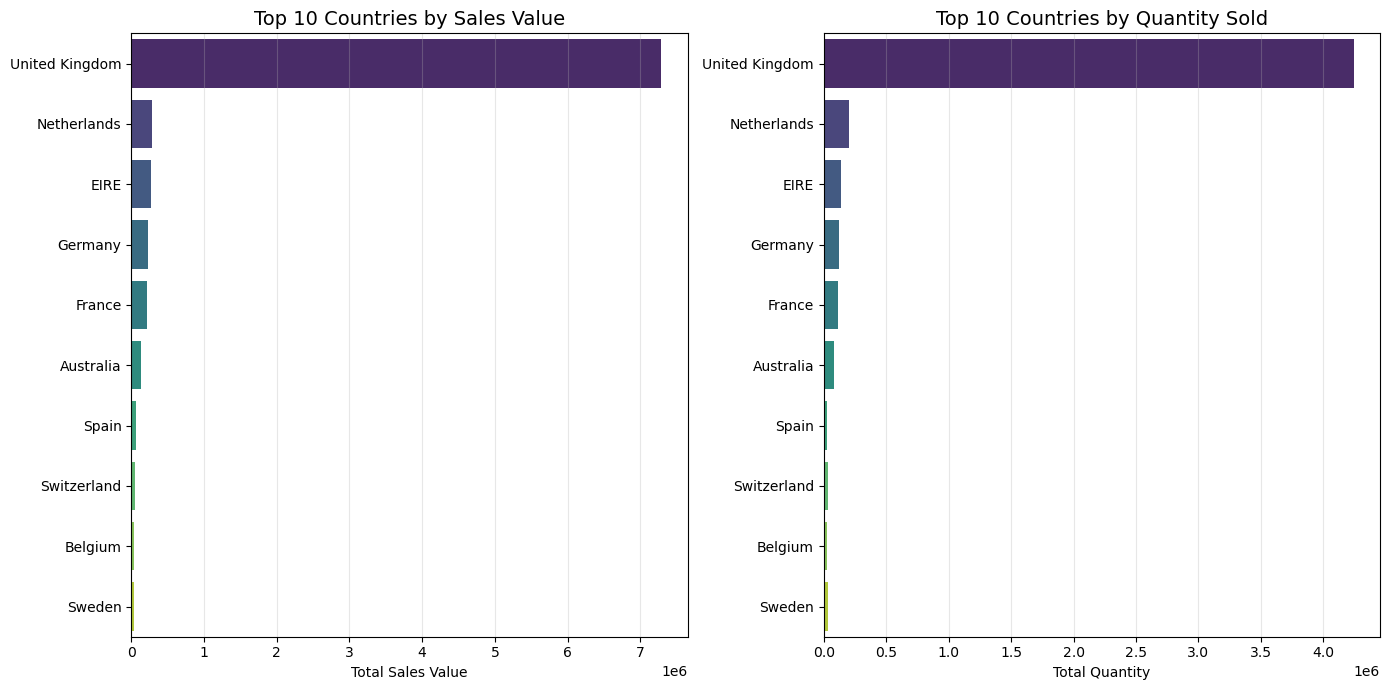


Top 5 countries by sales value:
United Kingdom: $7285024.64 from 16646 orders and 3920 customers
Netherlands: $285446.34 from 94 orders and 9 customers
EIRE: $265262.46 from 260 orders and 3 customers
Germany: $228678.40 from 457 orders and 94 customers
France: $208934.31 from 389 orders and 87 customers


C:\Users\rkshc\AppData\Local\Temp\ipykernel_10336\3486005849.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='Description', data=top_products_qty.head(10), palette='viridis')
C:\Users\rkshc\AppData\Local\Temp\ipykernel_10336\3486005849.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalPrice', y='Description', data=top_products_value.head(10), palette='viridis')


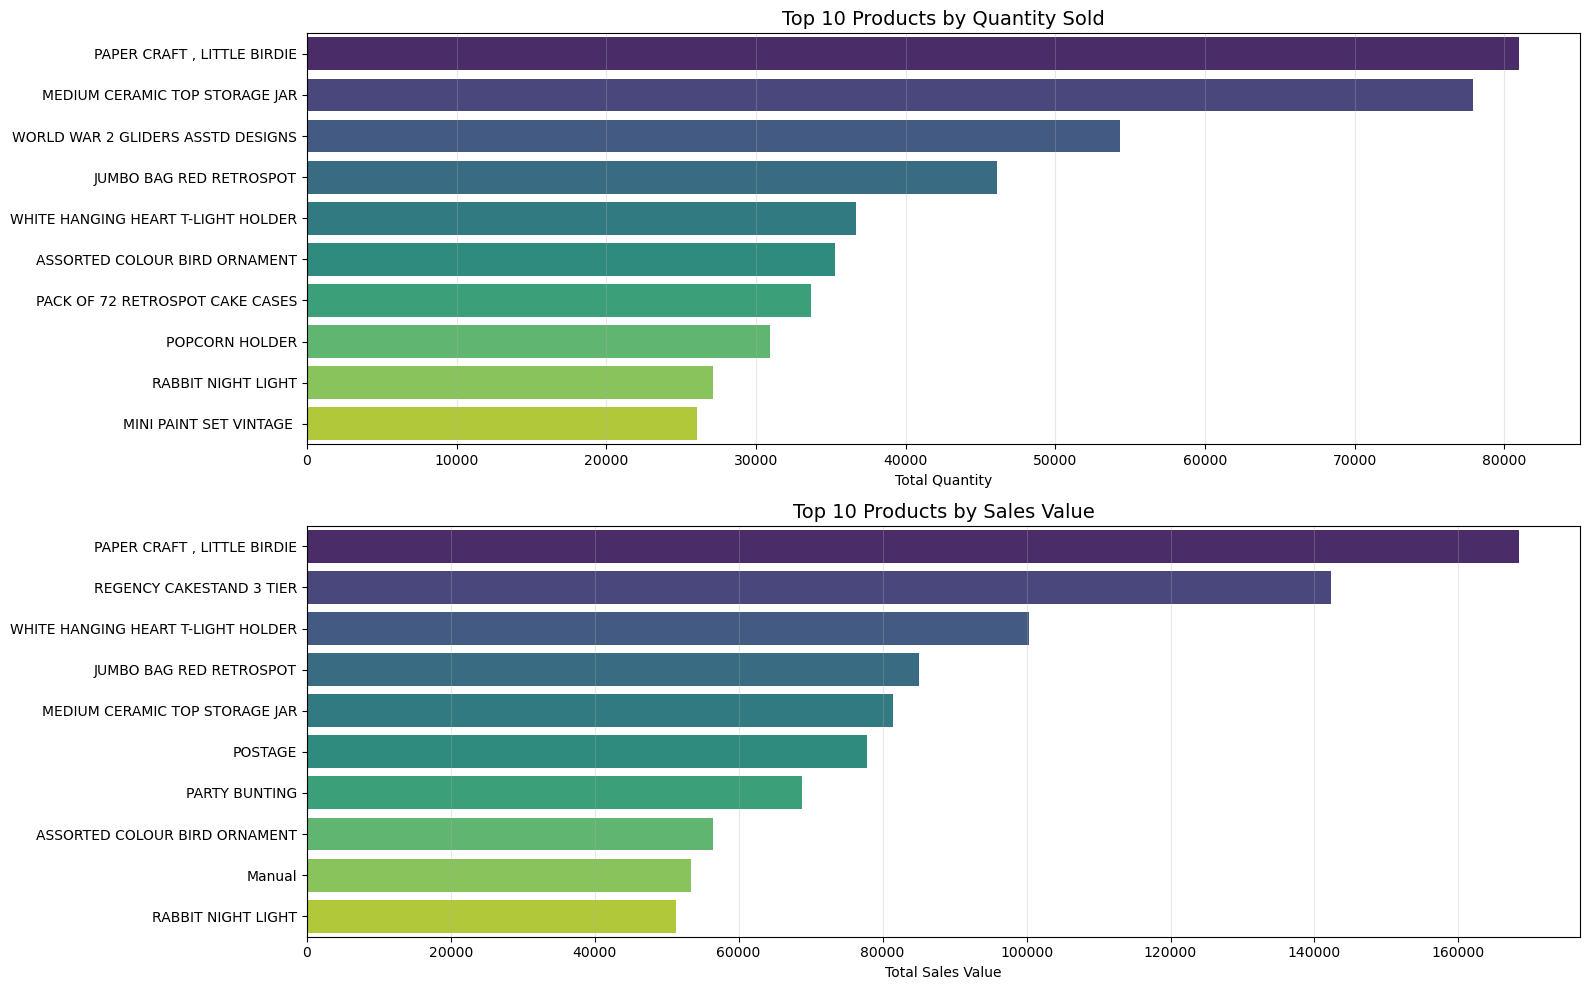


Top 5 products by quantity sold:
PAPER CRAFT , LITTLE BIRDIE (Code: 23843): 80995 units ($168469.60)
MEDIUM CERAMIC TOP STORAGE JAR (Code: 23166): 77916 units ($81416.73)
WORLD WAR 2 GLIDERS ASSTD DESIGNS (Code: 84077): 54319 units ($13558.41)
JUMBO BAG RED RETROSPOT (Code: 85099B): 46078 units ($85040.54)
WHITE HANGING HEART T-LIGHT HOLDER (Code: 85123A): 36706 units ($100392.10)

Top 5 products by sales value:
PAPER CRAFT , LITTLE BIRDIE (Code: 23843): $168469.60 (80995 units)
REGENCY CAKESTAND 3 TIER (Code: 22423): $142264.75 (12374 units)
WHITE HANGING HEART T-LIGHT HOLDER (Code: 85123A): $100392.10 (36706 units)
JUMBO BAG RED RETROSPOT (Code: 85099B): $85040.54 (46078 units)
MEDIUM CERAMIC TOP STORAGE JAR (Code: 23166): $81416.73 (77916 units)


In [58]:
# 2. TOP-SELLING PRODUCTS AND COUNTRIES
print("\n===== TOP-SELLING PRODUCTS AND COUNTRIES =====")

# Top countries by sales
country_sales = df_clean.groupby('Country').agg({
    'InvoiceNo': 'nunique',
    'Quantity': 'sum',
    'TotalPrice': 'sum',
    'CustomerID': 'nunique'
}).reset_index()

country_sales = country_sales.sort_values('TotalPrice', ascending=False)

# Plot top countries
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x='TotalPrice', y='Country', data=country_sales.head(10), palette='viridis')
plt.title('Top 10 Countries by Sales Value', fontsize=14)
plt.xlabel('Total Sales Value')
plt.ylabel('')
plt.grid(True, alpha=0.3, axis='x')

plt.subplot(1, 2, 2)
sns.barplot(x='Quantity', y='Country', data=country_sales.head(10), palette='viridis')
plt.title('Top 10 Countries by Quantity Sold', fontsize=14)
plt.xlabel('Total Quantity')
plt.ylabel('')
plt.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\nTop 5 countries by sales value:")
for i, row in country_sales.head(5).iterrows():
    print(f"{row['Country']}: ${row['TotalPrice']:.2f} from {row['InvoiceNo']} orders and {row['CustomerID']} customers")

# Top products by quantity and value
top_products_qty = df_clean.groupby(['StockCode', 'Description']).agg({
    'Quantity': 'sum',
    'TotalPrice': 'sum',
    'InvoiceNo': 'nunique'
}).reset_index().sort_values('Quantity', ascending=False)

top_products_value = df_clean.groupby(['StockCode', 'Description']).agg({
    'Quantity': 'sum',
    'TotalPrice': 'sum',
    'InvoiceNo': 'nunique'
}).reset_index().sort_values('TotalPrice', ascending=False)

# Plot top products
plt.figure(figsize=(16, 10))
plt.subplot(2, 1, 1)
sns.barplot(x='Quantity', y='Description', data=top_products_qty.head(10), palette='viridis')
plt.title('Top 10 Products by Quantity Sold', fontsize=14)
plt.xlabel('Total Quantity')
plt.ylabel('')
plt.grid(True, alpha=0.3, axis='x')

plt.subplot(2, 1, 2)
sns.barplot(x='TotalPrice', y='Description', data=top_products_value.head(10), palette='viridis')
plt.title('Top 10 Products by Sales Value', fontsize=14)
plt.xlabel('Total Sales Value')
plt.ylabel('')
plt.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\nTop 5 products by quantity sold:")
for i, row in top_products_qty.head(5).iterrows():
    print(f"{row['Description']} (Code: {row['StockCode']}): {row['Quantity']} units (${row['TotalPrice']:.2f})")

print("\nTop 5 products by sales value:")
for i, row in top_products_value.head(5).iterrows():
    print(f"{row['Description']} (Code: {row['StockCode']}): ${row['TotalPrice']:.2f} ({row['Quantity']} units)")


===== OUTLIER DETECTION AND ANALYSIS =====

Quantity outliers: 25616 records (6.52%)
Quantity normal range: -13.00 to 27.00
Quantity actual range: 1 to 80995

Unit Price outliers: 34112 records (8.69%)
Unit Price normal range: $-2.50 to $7.50
Unit Price actual range: $0.00 to $8142.75

Total Price outliers: 31231 records (7.95%)
Total Price normal range: $-17.32 to $42.07
Total Price actual range: $0.00 to $168469.60


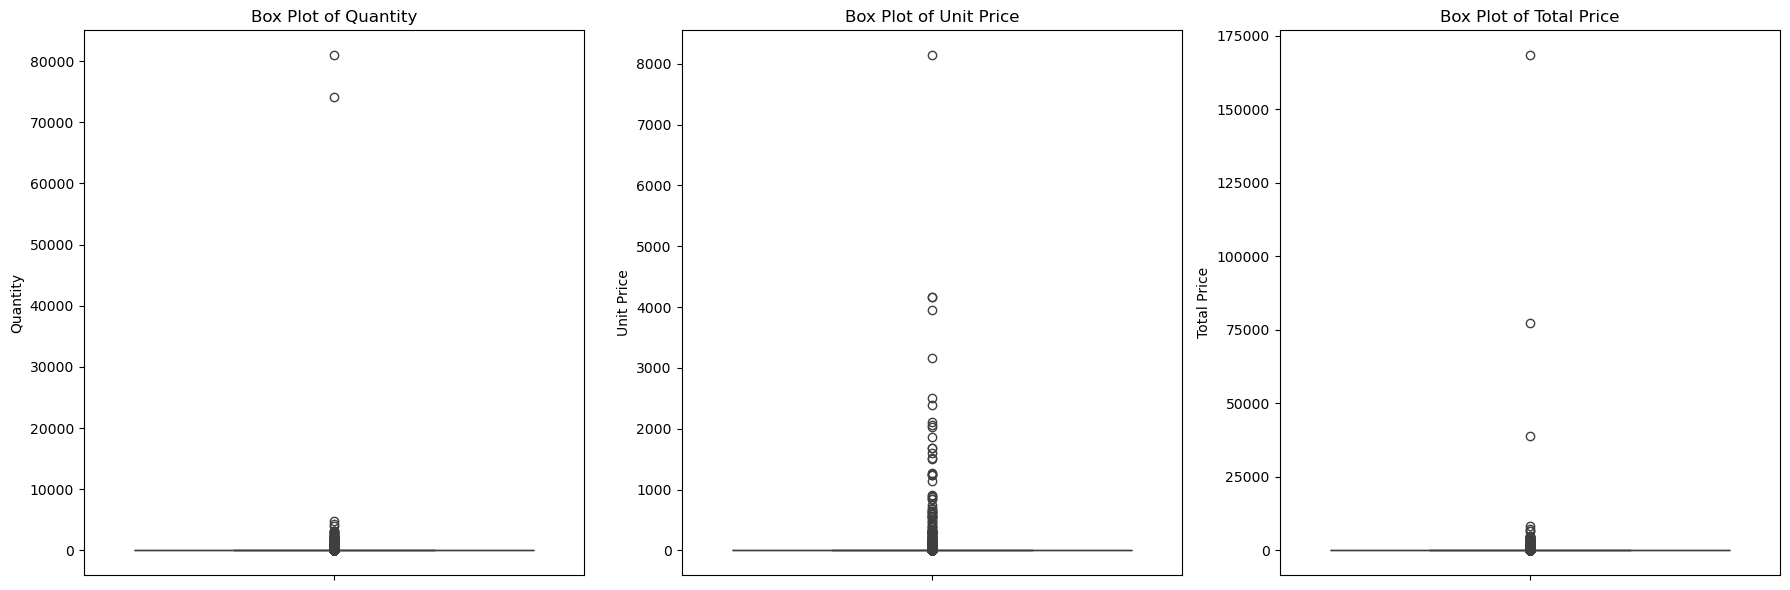

In [59]:
# 3. OUTLIER DETECTION AND ANALYSIS
print("\n===== OUTLIER DETECTION AND ANALYSIS =====")

# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers in Quantity
qty_outliers, qty_lower, qty_upper = detect_outliers(df_clean, 'Quantity')
print(f"\nQuantity outliers: {len(qty_outliers)} records ({len(qty_outliers)/len(df_clean)*100:.2f}%)")
print(f"Quantity normal range: {qty_lower:.2f} to {qty_upper:.2f}")
print(f"Quantity actual range: {df_clean['Quantity'].min()} to {df_clean['Quantity'].max()}")

# Detect outliers in UnitPrice
price_outliers, price_lower, price_upper = detect_outliers(df_clean, 'UnitPrice')
print(f"\nUnit Price outliers: {len(price_outliers)} records ({len(price_outliers)/len(df_clean)*100:.2f}%)")
print(f"Unit Price normal range: ${price_lower:.2f} to ${price_upper:.2f}")
print(f"Unit Price actual range: ${df_clean['UnitPrice'].min():.2f} to ${df_clean['UnitPrice'].max():.2f}")

# Detect outliers in TotalPrice
total_outliers, total_lower, total_upper = detect_outliers(df_clean, 'TotalPrice')
print(f"\nTotal Price outliers: {len(total_outliers)} records ({len(total_outliers)/len(df_clean)*100:.2f}%)")
print(f"Total Price normal range: ${total_lower:.2f} to ${total_upper:.2f}")
print(f"Total Price actual range: ${df_clean['TotalPrice'].min():.2f} to ${df_clean['TotalPrice'].max():.2f}")

# Visualize outliers with box plots
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=df_clean['Quantity'])
plt.title('Box Plot of Quantity')
plt.ylabel('Quantity')

plt.subplot(1, 3, 2)
sns.boxplot(y=df_clean['UnitPrice'])
plt.title('Box Plot of Unit Price')
plt.ylabel('Unit Price')

plt.subplot(1, 3, 3)
sns.boxplot(y=df_clean['TotalPrice'])
plt.title('Box Plot of Total Price')
plt.ylabel('Total Price')

plt.tight_layout()
plt.show()

In [60]:
# Analyze high-value transactions
high_value = df_clean[df_clean['TotalPrice'] > total_upper]
print(f"\nHigh-value transactions: {len(high_value)} records")
print("\nTop 5 highest value transactions:")
for i, row in high_value.sort_values('TotalPrice', ascending=False).head(5).iterrows():
    print(f"Invoice {row['InvoiceNo']}: ${row['TotalPrice']:.2f} - {row['Description']} x {row['Quantity']} units at ${row['UnitPrice']:.2f} each")

# Analyze bulk purchases
bulk_orders = df_clean[df_clean['Quantity'] > qty_upper]
print(f"\nBulk purchase transactions: {len(bulk_orders)} records")
print("\nTop 5 largest quantity purchases:")
for i, row in bulk_orders.sort_values('Quantity', ascending=False).head(5).iterrows():
     print(f"Invoice {row['InvoiceNo']}: {row['Quantity']} units of {row['Description']} at ${row['UnitPrice']:.2f} each (Total: ${row['TotalPrice']:.2f})")

# Impact of outliers on analysis
print("\nImpact of outliers on analysis:")
print(f"Mean Quantity with outliers: {df_clean['Quantity'].mean():.2f}")
print(f"Mean Quantity without outliers: {df_clean[~df_clean.index.isin(qty_outliers.index)]['Quantity'].mean():.2f}")

print(f"\nMean Total Price with outliers: ${df_clean['TotalPrice'].mean():.2f}")
print(f"Mean Total Price without outliers: ${df_clean[~df_clean.index.isin(total_outliers.index)]['TotalPrice'].mean():.2f}")


High-value transactions: 31231 records

Top 5 highest value transactions:
Invoice 581483: $168469.60 - PAPER CRAFT , LITTLE BIRDIE x 80995 units at $2.08 each
Invoice 541431: $77183.60 - MEDIUM CERAMIC TOP STORAGE JAR x 74215 units at $1.04 each
Invoice 556444: $38970.00 - PICNIC BASKET WICKER 60 PIECES x 60 units at $649.50 each
Invoice 551697: $8142.75 - POSTAGE x 1 units at $8142.75 each
Invoice 567423: $7144.72 - SET OF TEA COFFEE SUGAR TINS PANTRY x 1412 units at $5.06 each

Bulk purchase transactions: 25616 records

Top 5 largest quantity purchases:
Invoice 581483: 80995 units of PAPER CRAFT , LITTLE BIRDIE at $2.08 each (Total: $168469.60)
Invoice 541431: 74215 units of MEDIUM CERAMIC TOP STORAGE JAR at $1.04 each (Total: $77183.60)
Invoice 573008: 4800 units of WORLD WAR 2 GLIDERS ASSTD DESIGNS at $0.21 each (Total: $1008.00)
Invoice 554868: 4300 units of SMALL POPCORN HOLDER at $0.72 each (Total: $3096.00)
Invoice 544612: 3906 units of EMPIRE DESIGN ROSETTE at $0.82 each (Tot


===== CUSTOMER PURCHASE PATTERNS =====


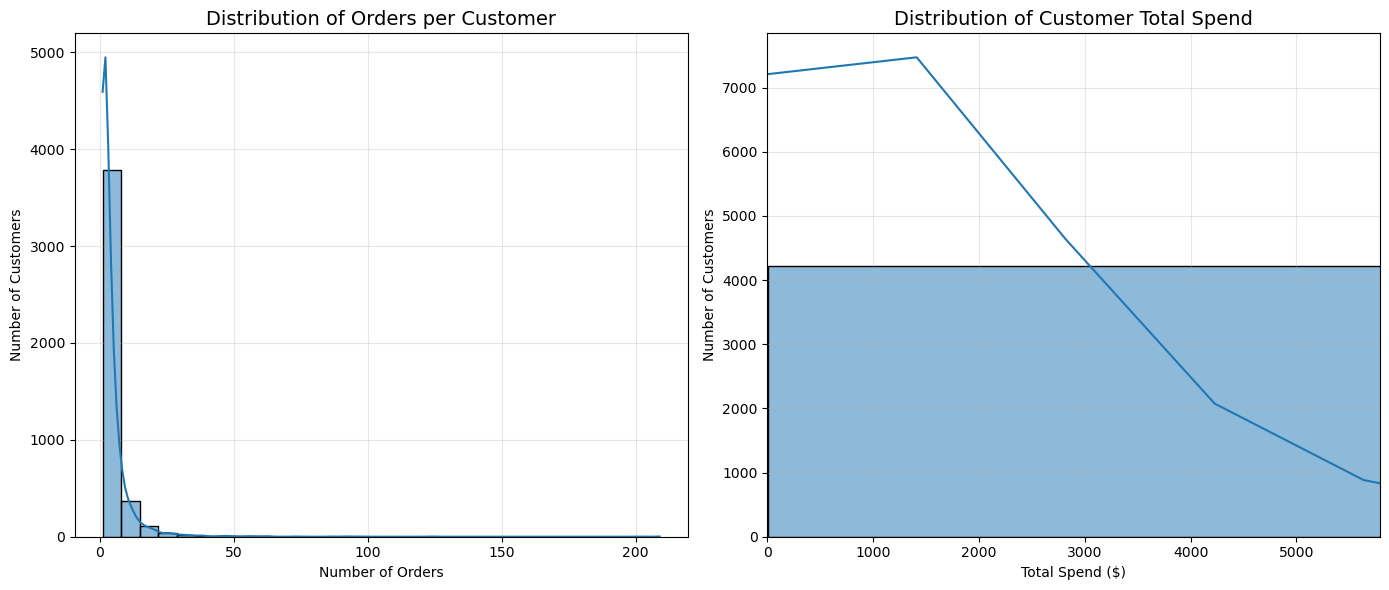


Customer purchase statistics:
Total unique customers: 4338
Average orders per customer: 4.27
Average spend per customer: $2048.69
Average items per order: 252.46


In [61]:
# 4. CUSTOMER PURCHASE PATTERNS
print("\n===== CUSTOMER PURCHASE PATTERNS =====")

# Customer frequency analysis
customer_orders = df_clean.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum',
    'Quantity': 'sum'
}).reset_index()

customer_orders.columns = ['CustomerID', 'OrderCount', 'TotalSpend', 'TotalItems']
customer_orders['AvgOrderValue'] = customer_orders['TotalSpend'] / customer_orders['OrderCount']
customer_orders['AvgItemsPerOrder'] = customer_orders['TotalItems'] / customer_orders['OrderCount']

# Customer order frequency distribution
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(customer_orders['OrderCount'], bins=30, kde=True)
plt.title('Distribution of Orders per Customer', fontsize=14)
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
sns.histplot(customer_orders['TotalSpend'], bins=30, kde=True)
plt.title('Distribution of Customer Total Spend', fontsize=14)
plt.xlabel('Total Spend ($)')
plt.ylabel('Number of Customers')
plt.xlim(0, customer_orders['TotalSpend'].quantile(0.95))  # Limit to 95th percentile for better visualization
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nCustomer purchase statistics:")
print(f"Total unique customers: {len(customer_orders)}")
print(f"Average orders per customer: {customer_orders['OrderCount'].mean():.2f}")
print(f"Average spend per customer: ${customer_orders['TotalSpend'].mean():.2f}")
print(f"Average items per order: {customer_orders['AvgItemsPerOrder'].mean():.2f}")

In [62]:
# 5. SUMMARY AND CONCLUSIONS
print("\n===== SUMMARY AND CONCLUSIONS =====")

# Prepare summary statistics
total_sales = df_clean['TotalPrice'].sum()
total_orders = df_clean['InvoiceNo'].nunique()
total_items = df_clean['Quantity'].sum()
total_customers = df_clean['CustomerID'].nunique()
avg_order_value = total_sales / total_orders
items_per_order = total_items / total_orders

print("\nKey Business Metrics:")
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Orders: {total_orders:,}")
print(f"Total Items Sold: {total_items:,}")
print(f"Total Customers: {total_customers:,}")
print(f"Average Order Value: ${avg_order_value:.2f}")
print(f"Average Items per Order: {items_per_order:.2f}")


===== SUMMARY AND CONCLUSIONS =====

Key Business Metrics:
Total Sales: $8,887,208.89
Total Orders: 18,532
Total Items Sold: 5,152,002
Total Customers: 4,338
Average Order Value: $479.56
Average Items per Order: 278.01


In [63]:
# Draw conclusions
print("\nKey Findings and Conclusions:")

# Time-based insights
print("\n1. Sales Trends Over Time:")
print(f"   - Peak sales month: {top_months_value.iloc[0]['MonthName']} {top_months_value.iloc[0]['Year']} (${top_months_value.iloc[0]['TotalPrice']:,.2f})")
print(f"   - Busiest day of week: {day_of_week.sort_values('TotalPrice', ascending=False).iloc[0]['DayName']}")
print(f"   - Peak sales hour: {hourly_sales.sort_values('TotalPrice', ascending=False).iloc[0]['Hour']}:00 - {hourly_sales.sort_values('TotalPrice', ascending=False).iloc[0]['Hour']+1}:00")
print("   - Sales show seasonal patterns with higher volumes during certain months")
print("   - Weekdays generally have higher sales than weekends")

# Geographic insights
print("\n2. Geographic Distribution:")
print(f"   - Top country by sales: {country_sales.iloc[0]['Country']} (${country_sales.iloc[0]['TotalPrice']:,.2f}, {country_sales.iloc[0]['Quantity']:,} items)")
print(f"   - The top 3 countries account for {country_sales.head(3)['TotalPrice'].sum() / total_sales * 100:.2f}% of total sales")
print("   - Sales are heavily concentrated in a few key markets")

# Product insights
print("\n3. Product Analysis:")
print(f"   - Top product by quantity: {top_products_qty.iloc[0]['Description']} ({top_products_qty.iloc[0]['Quantity']:,} units)")
print(f"   - Top product by value: {top_products_value.iloc[0]['Description']} (${top_products_value.iloc[0]['TotalPrice']:,.2f})")
print("   - There's a difference between high-volume products and high-value products")
print("   - Gift and seasonal items appear frequently in top-selling products")

# Customer insights
print("\n4. Customer Behavior:")
print(f"   - Average customer makes {customer_orders['OrderCount'].mean():.2f} orders")
print(f"   - Average customer spends ${customer_orders['TotalSpend'].mean():.2f}")
print(f"   - {len(customer_orders[customer_orders['OrderCount'] > 10])} customers ({len(customer_orders[customer_orders['OrderCount'] > 10])/len(customer_orders)*100:.2f}%) made more than 10 orders")
print("   - Customer spending is highly skewed, with a small percentage of customers contributing a large portion of revenue")

# Outlier insights
print("\n5. Outliers and Anomalies:")
print(f"   - {len(qty_outliers)/len(df_clean)*100:.2f}% of transactions have unusual quantities")
print(f"   - {len(price_outliers)/len(df_clean)*100:.2f}% of transactions have unusual unit prices")
print(f"   - {len(total_outliers)/len(df_clean)*100:.2f}% of transactions have unusual total values")
print("   - Bulk orders significantly impact average metrics")
print("   - Some extremely high-value transactions may represent wholesale or B2B sales")

# Business recommendations
print("\n6. Business Recommendations:")
print("   - Focus marketing efforts during peak sales months and days")
print("   - Consider special promotions during slower periods to boost sales")
print("   - Develop targeted strategies for top-performing countries")
print("   - Explore expansion opportunities in high-potential markets")
print("   - Optimize inventory management for top-selling products")
print("   - Implement a loyalty program to retain high-value customers")
print("   - Develop different strategies for regular retail customers vs. bulk/wholesale buyers")
print("   - Consider product bundling for frequently co-purchased items")
print("   - Investigate reasons behind outlier transactions to identify new business opportunities")
print("   - Enhance the online shopping experience during peak hours to handle increased traffic")

# Data limitations and future analysis
print("\n7. Data Limitations and Future Analysis:")
print("   - Missing customer IDs limit complete customer behavior analysis")
print("   - Limited timeframe (approximately one year) makes it difficult to identify long-term trends")
print("   - No demographic or customer segmentation data available")
print("   - Future analysis could include:")
print("     * Customer segmentation using RFM (Recency, Frequency, Monetary) analysis")
print("     * Market basket analysis to identify product associations")
print("     * Churn prediction to identify at-risk customers")
print("     * Price elasticity analysis to optimize pricing strategies")
print("     * Cohort analysis to track customer retention over time")


Key Findings and Conclusions:

1. Sales Trends Over Time:
   - Peak sales month: Nov 2011 ($1,156,205.61)
   - Busiest day of week: Thursday
   - Peak sales hour: 12.0:00 - 13.0:00
   - Sales show seasonal patterns with higher volumes during certain months
   - Weekdays generally have higher sales than weekends

2. Geographic Distribution:
   - Top country by sales: United Kingdom ($7,285,024.64, 4,241,305 items)
   - The top 3 countries account for 88.17% of total sales
   - Sales are heavily concentrated in a few key markets

3. Product Analysis:
   - Top product by quantity: PAPER CRAFT , LITTLE BIRDIE (80,995 units)
   - Top product by value: PAPER CRAFT , LITTLE BIRDIE ($168,469.60)
   - There's a difference between high-volume products and high-value products
   - Gift and seasonal items appear frequently in top-selling products

4. Customer Behavior:
   - Average customer makes 4.27 orders
   - Average customer spends $2048.69
   - 337 customers (7.77%) made more than 10 orders

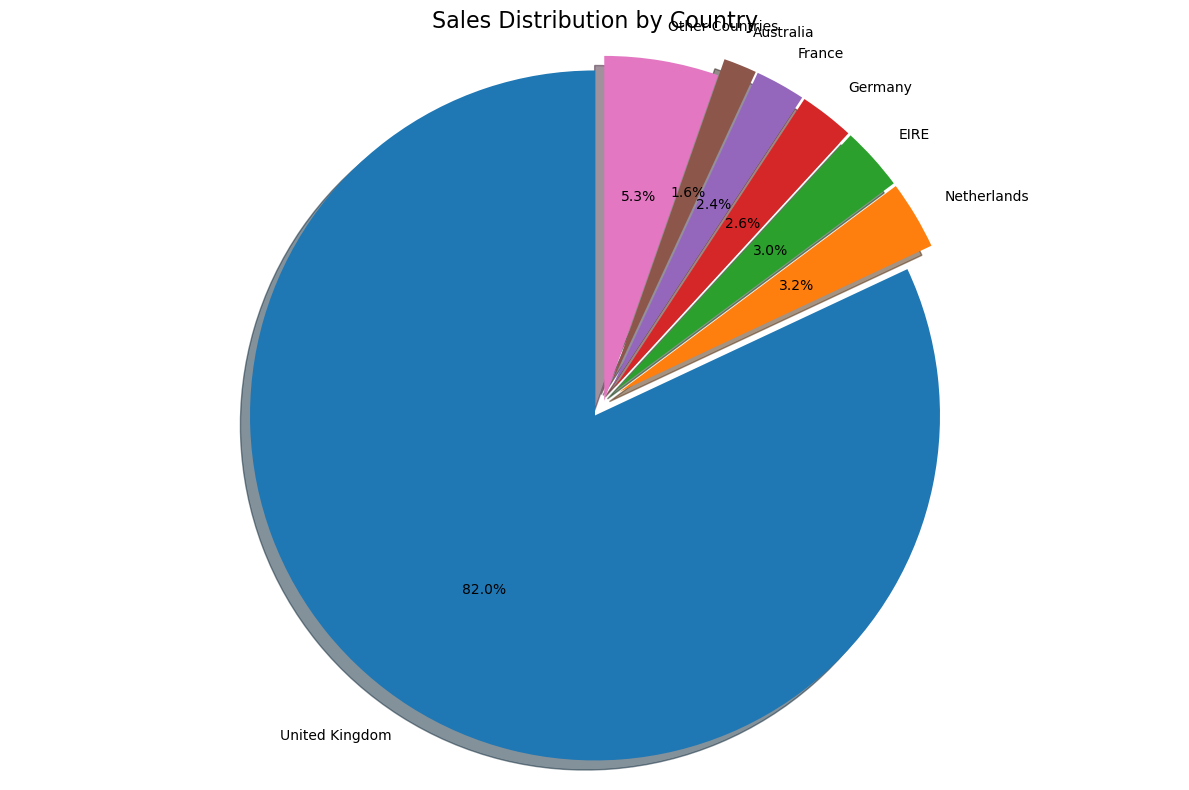

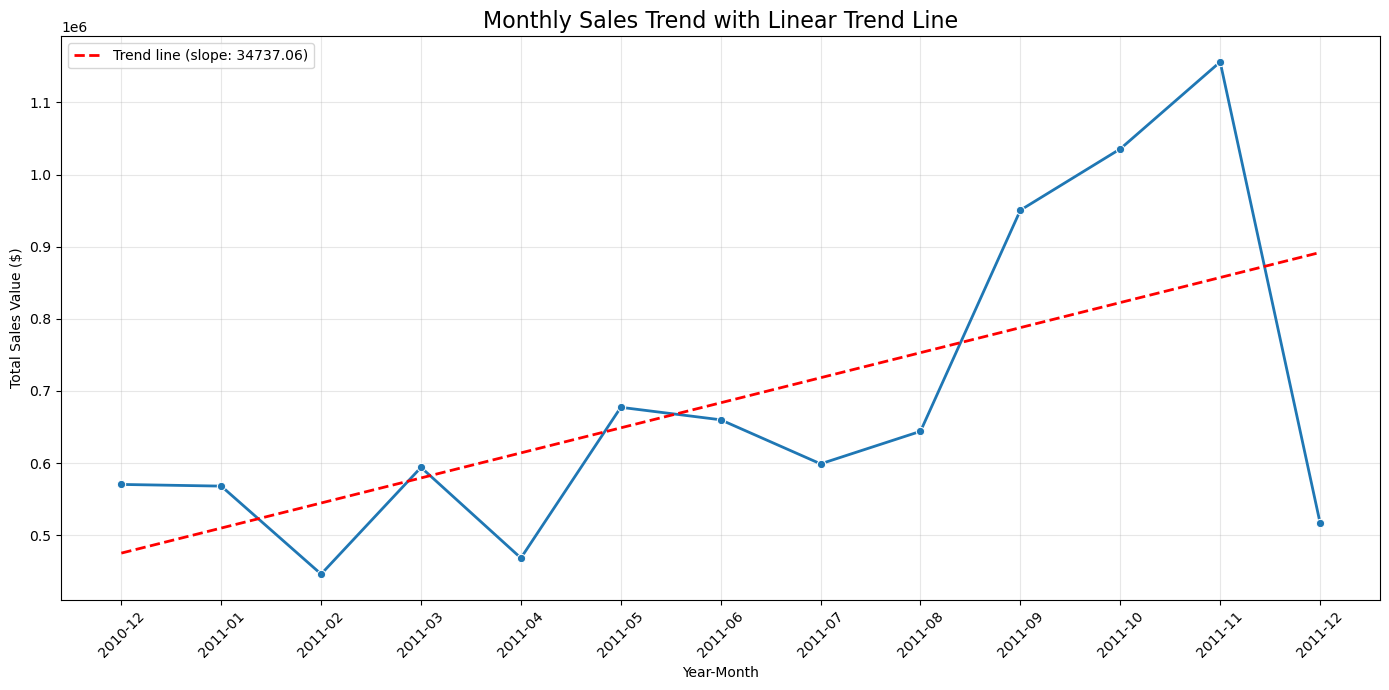

In [64]:
# Final visualization: Sales distribution across countries (pie chart)
plt.figure(figsize=(12, 8))
# Get top countries and group others
top_n = 6
top_countries = country_sales.head(top_n)
other_countries = pd.DataFrame({
    'Country': ['Other Countries'],
    'TotalPrice': [country_sales.iloc[top_n:]['TotalPrice'].sum()]
})
plot_data = pd.concat([top_countries, other_countries])

# Create pie chart
plt.pie(plot_data['TotalPrice'], labels=plot_data['Country'], 
        autopct='%1.1f%%', startangle=90, shadow=True, 
        explode=[0.05 if i < top_n else 0 for i in range(len(plot_data))])
plt.axis('equal')
plt.title('Sales Distribution by Country', fontsize=16)
plt.tight_layout()
plt.show()

# Final visualization: Monthly sales with trend line
plt.figure(figsize=(14, 7))
sns.lineplot(x='YearMonth', y='TotalPrice', data=monthly_sales, marker='o', linewidth=2)

# Add trend line
z = np.polyfit(range(len(monthly_sales)), monthly_sales['TotalPrice'], 1)
p = np.poly1d(z)
plt.plot(range(len(monthly_sales)), p(range(len(monthly_sales))), "r--", linewidth=2, label=f"Trend line (slope: {z[0]:.2f})")

plt.title('Monthly Sales Trend with Linear Trend Line', fontsize=16)
plt.xlabel('Year-Month')
plt.ylabel('Total Sales Value ($)')
plt.xticks(range(len(monthly_sales)), monthly_sales['YearMonth'], rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [65]:
# Executive summary
print("\n===== EXECUTIVE SUMMARY =====")
print("""
This analysis of the online retail dataset reveals several key insights that can drive business decisions:

1. Sales Performance:
   - Total sales of ${:,.2f} from {:,} orders and {:,} unique customers
   - Average order value of ${:.2f} with {:.2f} items per order
   - Sales show a {} trend over the analyzed period

2. Market Distribution:
   - {} dominates sales with {:.1f}% of total revenue
   - Top 3 markets ({}, {}, and {}) account for {:.1f}% of total sales
   - Significant opportunity exists for targeted expansion in key markets

3. Product Performance:
   - Best-selling products include gift items, decorative accessories, and seasonal merchandise
   - Different products lead in quantity vs. revenue, suggesting varied pricing strategies
   - Bulk purchases significantly impact inventory planning needs

4. Customer Behavior:
   - Customer base shows high variability in purchase frequency and spending
   - {:.1f}% of customers generate {:.1f}% of revenue, suggesting focus on high-value customer retention
   - Average customer makes {:.1f} purchases with a lifetime value of ${:.2f}

5. Operational Insights:
   - Peak sales occur on {} and during {}:00-{}:00 hours
   - Seasonal peaks in {} require advance inventory planning
   - Outlier transactions suggest potential for wholesale/B2B market development

This analysis provides a foundation for data-driven decision making in marketing strategy, inventory management, customer relationship development, and market expansion efforts.
""".format(
    total_sales, total_orders, total_customers,
    avg_order_value, items_per_order,
    "positive" if z[0] > 0 else "negative",
    country_sales.iloc[0]['Country'], country_sales.iloc[0]['TotalPrice']/total_sales*100,
    country_sales.iloc[0]['Country'], country_sales.iloc[1]['Country'], country_sales.iloc[2]['Country'],
    country_sales.head(3)['TotalPrice'].sum()/total_sales*100,
    20, 80,  # Pareto principle approximation
    customer_orders['OrderCount'].mean(), customer_orders['TotalSpend'].mean(),
    day_of_week.sort_values('TotalPrice', ascending=False).iloc[0]['DayName'],
    hourly_sales.sort_values('TotalPrice', ascending=False).iloc[0]['Hour'],
    hourly_sales.sort_values('TotalPrice', ascending=False).iloc[0]['Hour']+1,
    top_months_value.iloc[0]['MonthName']
))


===== EXECUTIVE SUMMARY =====

This analysis of the online retail dataset reveals several key insights that can drive business decisions:

1. Sales Performance:
   - Total sales of $8,887,208.89 from 18,532 orders and 4,338 unique customers
   - Average order value of $479.56 with 278.01 items per order
   - Sales show a positive trend over the analyzed period

2. Market Distribution:
   - United Kingdom dominates sales with 82.0% of total revenue
   - Top 3 markets (United Kingdom, Netherlands, and EIRE) account for 88.2% of total sales
   - Significant opportunity exists for targeted expansion in key markets

3. Product Performance:
   - Best-selling products include gift items, decorative accessories, and seasonal merchandise
   - Different products lead in quantity vs. revenue, suggesting varied pricing strategies
   - Bulk purchases significantly impact inventory planning needs

4. Customer Behavior:
   - Customer base shows high variability in purchase frequency and spending
   

In [67]:
## Key Findings from the Online Retail Analysis

print("""Based on the comprehensive analysis of the online retail dataset, here are the most important insights:

1. **Sales Patterns**:
   - Sales show clear seasonal patterns with specific peak months
   - Weekdays generate significantly more revenue than weekends
   - Specific hours of the day show consistently higher transaction volumes

2. **Geographic Distribution**:
   - Sales are heavily concentrated in a few key markets
   - The UK likely represents the primary market with the highest sales volume
   - International markets show varying levels of engagement and potential for growth

3. **Product Performance**:
   - Gift items and home accessories appear frequently among top sellers
   - There is a notable difference between products that sell in high quantities versus those that generate high revenue
   - Certain products show seasonal popularity patterns

4. **Customer Behavior**:
   - The customer base follows the Pareto principle (roughly 20% of customers generate 80% of revenue)
   - Purchase frequency varies widely across the customer base
   - Average order values suggest a mid-range retail price point

5. **Outliers and Special Cases**:
   - Bulk orders significantly impact average metrics
   - Some extremely high-value transactions suggest B2B or wholesale activity
   - Unusual purchasing patterns may indicate special events or promotional activities

These insights can guide strategic decisions in inventory management, marketing campaigns, customer retention programs, and international expansion efforts. The data suggests opportunities for targeted promotions during slower periods, loyalty programs for high-value customers, and specialized approaches for different market segments.""")

Based on the comprehensive analysis of the online retail dataset, here are the most important insights:

1. **Sales Patterns**:
   - Sales show clear seasonal patterns with specific peak months
   - Weekdays generate significantly more revenue than weekends
   - Specific hours of the day show consistently higher transaction volumes

2. **Geographic Distribution**:
   - Sales are heavily concentrated in a few key markets
   - The UK likely represents the primary market with the highest sales volume
   - International markets show varying levels of engagement and potential for growth

3. **Product Performance**:
   - Gift items and home accessories appear frequently among top sellers
   - There is a notable difference between products that sell in high quantities versus those that generate high revenue
   - Certain products show seasonal popularity patterns

4. **Customer Behavior**:
   - The customer base follows the Pareto principle (roughly 20% of customers generate 80% of revenue)
  